In [8]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import pandas as pd

In [4]:
df = pd.read_csv('drifts.csv')

In [5]:
df

,model,run,OHC (J yr-1),barystatic OHC (J yr-1),thermal OHC (J yr-1),hfds (J yr-1),netTOA (J yr-1),wfo (kg yr-1),masso (kg yr-1),soga (g/kg yr-1),masso (g/kg yr-1),zosbary (m y-1),zostoga (m yr-1),masso (m yr-1)
0,ACCESS1-0,r1i1p1,1.880000e+21,1.470000e+20,1.730000e+21,2.290000e+21,7.820000e+21,-1.307750e+14,1.323700e+14,-0.000004,-0.000003,0.000334,0.000178,0.000354
1,ACCESS1-3,r1i1p1,-2.420000e+21,-6.240000e+20,-1.800000e+21,-1.270000e+21,1.650000e+21,-8.065390e+14,-5.630000e+14,0.000015,0.000015,-0.001505,-0.000177,-0.001506


In [37]:
def abline(ax, slope, intercept):
    """Plot a line from slope and intercept"""

    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, linestyle='--', c='0.5')
    
    
def format_axis_label(orig_label):
    """Put LaTeX math into axis labels"""
    
    return orig_label.replace('(', '($').replace(')', '$)').replace('yr-1', '\; yr^{-1}')

In [39]:
def plot_comparison(df, title, xvar, yvar):
    """Plot comparison for given x and y variables."""

    fig, ax = plt.subplots()

    colormap = cm.viridis
    colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(df['model']))]

    for dotnum, color in enumerate(colorlist):
        x = df[xvar][dotnum]
        y = df[yvar][dotnum]
        label = df['model'][dotnum] + ' (' + df['run'][dotnum] + ')'
        ax.scatter(x, y, label=label, s=50, linewidth=0.1, c=color)
        ax.legend()

    abline(ax, 1, 0)
    ax.axhline(y=0, color='0.5')
    ax.axvline(x=0, color='0.5')
    ax.yaxis.major.formatter._useMathText = True
    ax.xaxis.major.formatter._useMathText = True

    ax.set_title(title)
    ylabel = format_axis_label(yvar)
    ax.set_ylabel(ylabel)
    xlabel = format_axis_label(xvar)
    ax.set_xlabel(xlabel)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

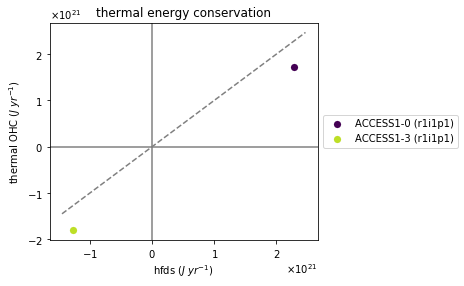

In [41]:
plot_comparison(df, 'thermal energy conservation', 'hfds (J yr-1)', 'thermal OHC (J yr-1)')

Below the 1:1 line indicates that the ocean model is losing heat.

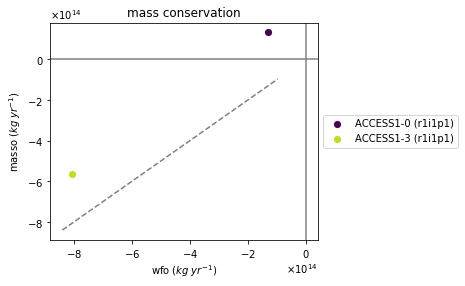

In [42]:
plot_comparison(df, 'mass conservation', 'wfo (kg yr-1)', 'masso (kg yr-1)')

Below the 1:1 line indicates that the ocean model is losing mass.

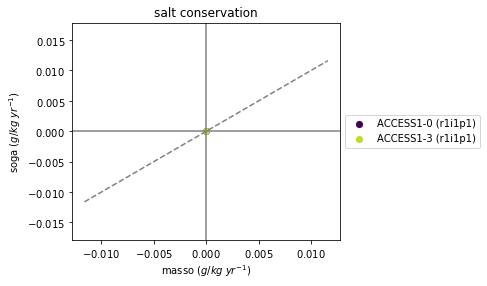

In [43]:
plot_comparison(df, 'salt conservation', 'masso (g/kg yr-1)', 'soga (g/kg yr-1)')